<a href="https://colab.research.google.com/github/darpan02-cypher/ML_foundation/blob/main/note_linear_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

$
\newcommand{\xv}{\mathbf{x}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\thetav}{\mathbf{\theta}}
 \newcommand{\xspace}{\mathcal{X}}
 \newcommand{\yspace}{\mathcal{Y}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\tm}{\mathbf{T}}
 \newcommand{\xm}{\mathbf{X}}
 \newcommand{\im}{\mathbf{I}}
$

# Linear Modeling Notes

## Supervised Learning: Regression review

$$ f: \xspace \rightarrow \yspace $$

Recall supervised learning can be formulated as above where we want to map a given input space $\mathcal{X}$ (i.e., data) to some output space $\mathcal{Y}$ (i.e., labels/targets).

For instance, if we want to predict temperature we might look for the data that we can use as our input $\Xm$ which has $m$ *data samples* (rows) and $n$ *features* (columns) such as humidity, history of temperature changes, air pressure, and vapor pressure. Additionally, we might have outputs or labels $\yv$ that correspond to today's temperature where $\yv \in \R^m$ such that we have $m$ real-valued labels. Once we have either recorded or found some weather data,our data might look like the following:

humidity (%) | last year temperature (&ordm;F) | yesterday's air pressure (inHG) | vapor pressure (inHG) | **Today's Temp** (&ordm;F)
---|---|---|---|---
23 | 72 | 30.12 | 0.79 | 76
15 | 82 | 29.32 | 0.68 | 81
 | | ... | |

Here, we note that the labels are *today's* not *tomorrow's* temperature.

We refer to the process for when a model is learning from data as *training*. Thus, dataset used for training (both the labels and the features) is referred to as either the *training set* or *training dataset*. In the above example, each row of the contains *data samples*, more specifically *training samples*, which will be fed to our model for learning.

Once you have data to work with, now you can apply learning algorithms (referred to using either $f$ or $h$) to find *weights* or *parameters*. A model with learned weights/parameters is also often referred to as our *hypothesis* function. We can make predictions using our hypothesis function (i.e., model). For instance, we can then generate today's predicted temperature given the current data features. If training is successful, we'll likely get a good prediction!

## Table of Notation

Below is a table of notation you'll encounter throughout this note and the class.


| Symbol                     | Meaning                     | Symbol    | Meaning                                                          |
|----------------------------|-----------------------------|-----------|------------------------------------------------------------------|
| $\xv$ or $\vec{x}$         | feature/input vector        | $x_i$     | $i$th element of $\xv$                                           |
| $\Xm$                      | input matrix                | $x_{i,j}$ | $i$th row and $j$th column of $\Xm$                              |
| $\yv$ or $\tv$             | labels/targets              | $n$       | number of features or columns
| $\wv$ or $\mathbf{\theta}$ | weight/parameter vector     | $m$       | number of data samples <br>(also used to refer to the slope) |samples or rows                                   |
| $f$ or $h$                 | hypothesis function <br> (i.e., a model)        | $\hat{\yv}$ <br> $f(\xv {;} \wv)$<br>$h(\xv {;} \wv)$ | predictions <br> y-hat |
| $E$              | error or sum of error (loss)  | $SSE$      | sum of squared error function                                            |
| $MSE$                      | mean squared error| $\nabla$  | gradient (prnounced nabla)                                       |
| $\partial$                 | partial derivative          | $\alpha$  | learning rate (prnounced alpha)                                  |       
| $J$ | general placeholder for the cost/objective function | $x^T$| transpose of a vector or matrix |
$b$ | bias or y-intercept term | | |

## Defining Linear Models

Linear models make predictions by computing a *linear combination* of our input features. In other words, a linear model computes a weighted sum of the input features with the model's learned weights where a bias term (also called the y-intercept term) is added to make the model more flexible (more on this soon).

Thus, to make a prediction for a **single data sample** we compute the following

$$
\begin{align}
\hat{y} &= w_0 +w_1 x_1 + ... +w_n x_n \\
\\
 &= \sum_{i=0}^{n} w_i x_i \quad\text{where } x_0 = 1  \tag{3a}\\
\end{align}
$$

where in this equation:

- $\hat{y}$ is the prediction value/output
- $n$ is the number of features
- $x_i$ is the ith feature value (a scalar)
    - $x_0$ is an additional feature we add to account for the bias term. We typically set $x_0 = 1$.
- $w_i$ is the ith model weight/parameter which includes the bias term at $w_0$.
    - Note you will often see the weights/parameters referred to as $\theta$ such that are equation becomes $\hat{y} = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n$

### Vector form

We can further write the prediction of a **single data sample** in vector form as follows

$$
\hat{y} = f_\wv(\xv) = h_\wv(\xv) = \xv^\top \cdot \wv = \xv^\top \wv
$$

where in this equation:
- $\wv$ is the model's *weight/parameter vector* which is a vector containing all weights for each feature $w_1$ to $w_n$ and includes the bias term $w_0$.
Thus, $\wv$ looks like the following:
$
\begin{align}
  \wv &= \begin{bmatrix}
          w_{0} \\
          w_{1} \\
          \vdots \\
          w_{n}
    \end{bmatrix}
\end{align}$
      
- $\xv$ is the *feature vector* for a **single data sample** (a single row from your dataset) which contains the values for features $x_0$ to $x_n$ where $x_0$ is always 1 (recall $x_0$ corresponds to $w_0$ which is the bias term).
Thus, $\xv$ looks like the following:
$
\begin{align}
\xv &= \begin{bmatrix}
      x_{0} \\
      x_{1} \\
      \vdots \\
      x_{n}
\end{bmatrix}
\end{align}$
- $ \wv^\top \cdot \xv$ is the dot product of the vectors $\wv$ and $\xv$ which is equal to $w_0 +w_1 x_1 + ... +w_n x_n$

- $f_\wv$, or $h_\wv$ are referred as the hypothesis function (i.e., our model) which uses the weights/parameters $\wv$ or $\mathbf{\theta}$
    - Note, we can also rewrite the hypothesis functions as $f(\xv ;\wv)$, or $h(\xv ;\wv)$ as well. It means, $f_\wv(\xv)$ has the same meaning as $f(\xv ;\wv)$.

### Matrix form      
Finally we write the equation for computing the predictions for  **all the data samples in our dataset** as follows

$$
\mathbf{\hat{y}} = f_\wv(\Xm) = h_\wv(\Xm) = \Xm \cdot \wv = \Xm \wv
$$

where in this equation:

- $\mathbf{\hat{y}}$ is the *prediction vector* which contains the predictions for each data sample. Thus, $\mathbf{\hat{y}}$ looks like the following:

\begin{align}
\mathbf{\hat{y}} &= \begin{bmatrix}
      \hat{y}_{0} \\
      \hat{y}_{1} \\
      \vdots \\
      \hat{y}_{m}
\end{bmatrix}
\end{align}

- $\Xm$ is a *data matrix* which contains all the data (this could be our train or test data). Recall  $\xv$ would be a single row from the matrix! Thus, $\xm$ looks like the following:
    \begin{align}
        \mathbf{\xm} &= \begin{bmatrix}
               x_{0, 0}, x_{0, 1}, ..., x_{0, n} \\
               x_{1, 0}, x_{1, 1}, ..., x_{1, n}  \\
               x_{m, 0}, x_{m, 1}, ..., x_{m, n}
         \end{bmatrix}
      \end{align}

> > Alternatively, $\xm$  can be write as a matrix of vectors $\xv_i$ as follows:
        \begin{align}
            \mathbf{\xm} &= \begin{bmatrix}
                   - \xv_{0} - \\
                   - \xv_{1} -  \\
                   \vdots \\
                   - \xv_{m} -
             \end{bmatrix}
          \end{align}
      

**Let's note down the shape of each variable (Important. Keep it in mind.)**:
- **X.shape = [m, n]**: m samples, each sample has n features

- **y.shape = [m, 1]**: m samples, each sample has a label (scalar). The prediction ̂$\hat{y}$ has the same shape as y. In python coding, the shape could be (m,) or (m, 1). But here, let's talk about math: the shape is [m, 1].

- **w.shape =[n,1]**: w is a vector with n elements; each element denotes the importance of the corresponding feature (recall each sample has n features). **The `w` is shared by all samples**.



### Linear Model Assumptions

Recall for each algorithm we make a set of assumptions about the data the algorithms takes. Below are the list of assumptions linear models make. This part is slightly more technical. For now, just be aware that for linear models we are making some assumptions that our data is supposed to follow. If one or more of these assumptions is violated then our linear model *might* produce unreliable results or it *might* not even work. We'll take a closer look at how to test for these assumptions in the lab.


**Assumptions**
Below are 4 main assumptions linear models make. Often people will report 7-10 assumptions in total but really these other assumptions arise from these main 4 assumptions.

1. Linearity: There exists a linear relationship between the independent variable, $\xm$, and the dependent variable, $\yv$.
    1. When this assumption is violated it means our data is likely non-linear and a linear model will not work!

2. Independent: The errors (also called residuals) are independent of one another.
    1. Violation of this assumption is mainly for time-series data and can lead to predictions that are vastly inaccurate.

3. Normality: The errors are normally distributed
    1. Violation of this assumption can be due to things such as:
        1. Multicollinearity: Some of the features in our data $\xm$ are correlated with one another which makes it hard for the model to learn which features actually matter when making predictions.
        1. Missing explanatory features: Your data could be missing features that better explain the target/label.

4. Equal variance (Homoscedasticity): The variance of errors are approximately equal.
    1. When this assumption is violated it indicates that certain observations (data samples) are affecting the model more than others. This can bias our model towards solutions that don't generalize well.



If you are interested in learning more about these assumptions please see the following readings:
- [PennState SLR model Assumptions](https://online.stat.psu.edu/stat501/lesson/4/4.1)
- [The Four Assumptions of Linear Regression](https://www.statology.org/linear-regression-assumptions/)



### Advantages of Linear Model

- Easy to implement
    - This helps it to avoid overfitting but can often cause underfitting
- Interpretable
    - Linear models tend to be more interpretable, meaning it is easier to see *why* a prediction as made if we use a few interesting tricks like LASSO regularization.
- Scalable
    - Linear models tend to be pretty computationally efficient due to their simplicity

### What does a linear model look like?

Given the linear model definition above, if we have a dataset $X$ where each sample $x$ has only 1 feature, we can derive the classical definition of a *line* which is

$$
y = wx + b
$$
where $w$ and $b$ denote weights and bias, respectively.

**Note, $w$, $w_0$, and $w_1$ are just three independent parameters. There is no relationship between them at all.**

This should remind you of our linear model defined above! Watch, if we substitute weights $w_0$ and $w_1$ in for $b$ and $w$ we get the following:

$$ y = w_1 x + w_0 $$

We can further change the formula of a line to look more like our linear model definition by switching $y$ for $\hat{y}$

$$ \hat{y} = w_1 x + w_0 $$

Thus, in this simple case, you can think of our line model as finding the best slope $w$ and y-intercept or bias variable $b$. Let's take a look at this in code to get a better feel for what is happening.

Below we simply define some random linear data where `X` defines our data and `y` defines our labels/targets.

In [ ]:
rng = np.random.RandomState(42)
X = 2 * rng.rand(100, 1)
y =  4 + 3 * X + rng.rand(100, 1)

print(f"Our data X shape: {X.shape}")
print(f"Our label y shape: {y.shape}")

Our data X shape: (100, 1)
Our label y shape: (100, 1)


Here's what our data looks like plotted

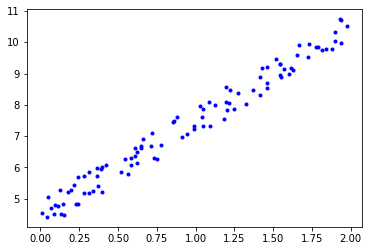

In [ ]:
plt.plot(X, y, 'b.');
plt.show()

Below we make predictions $\hat{y}$ and store them in the variable `y_hat` by setting values for `w` and `b`. We make the most naive line by taking the mean of our labels `y`! This require us to set `w=0` and `b=np.mean(y)`.

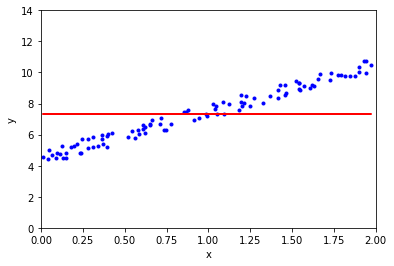

In [ ]:
# w is the slope or w_1
# this changes the steppness of the slope
w = 0
# b is the bias or w_0
# (this changes the y-intercept values)
b = np.mean(y)

# Here we can compute our line equation using simulated data X
y_hat =w * X + b

plt.plot(X, y, 'b.')
plt.plot(X, y_hat, 'r')

plt.ylabel('y')
plt.xlabel('x')
plt.ylim(0, 14)
plt.xlim(0, 2)
plt.show();

**Take a second and see if you can't select better values by changing `w` and `b` in the below code.**

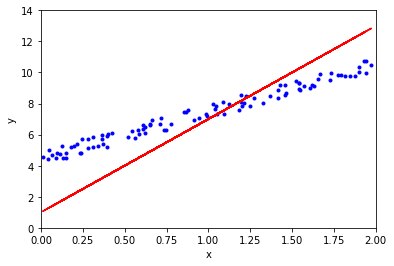

In [ ]:
# w is the slope or w_1
# this changes the steepness of the slope
w = 6
# b is the bias or w_0
# this changes the y-intercept values
b = 1

# Here we can compute our line equation using simulated data X
y_hat = w * X + b

plt.plot(X, y, 'b.')
plt.plot(X, y_hat, 'r')
plt.ylabel('y')
plt.xlabel('x')
plt.ylim(0, 14)
plt.xlim(0, 2)
plt.show();

As you try different values think about how do you know what the best line is? Visually, we can gage how well the line is doing. However, is there some quantifiable measure we can compute that would tell us what the best line is? Yes, there is!

## Minimizing the Cost Function

Before we go any further we need to layout some definitions of terms that will be used in this section and throughout the class. Below are some terms. Keep these definitions in mind as you go through this section.

- **Error**/residual: Measures the penalty for a given data point between the prediction and ground truth label. (Technically error and residual refer to two slightly different things ([reference post](https://stats.stackexchange.com/questions/133389/what-is-the-difference-between-errors-and-residuals)), however in ML we like to use these terms interchangeably). For example, the squared error measures the square distance between the prediction and the ground truth label.
- **Loss/Cost function**: Measures the total error over all the data (i.e., training set). For example, the sum of squared errors or mean the squared errors.
- **Objective function**: A function that we want to *optimize* or *minimize* when training using algorithms like gradient descent. For instance, we want to optimize a single cost function. The objective function is often considered equivalent to the cost function though they are technically different.
    
- Additional Term Reference
    - [Objective function, cost function, loss function: are they the same thing?](https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing)

To asses how "good" a line is fitting out data we can use what we call a *cost function*. Thus, a cost function computes a score that indicates to use how well our model fits our data. Here, **a model is said to have good fit when the cost value is very low**. A higher cost value indicates a bad fit! What would then be a good score for measuring how well a linear model fits our data?

Welp, let's think for a second. Technically, we could assess if our line-of-best-fit (i.e., our predictions) is good or bad based on the distance every label is to our line (i.e., predictions)! This might look like something below!

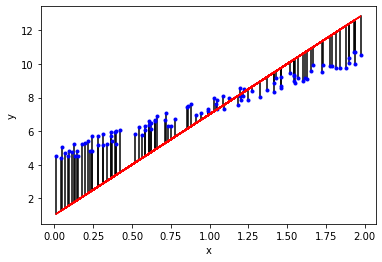

In [ ]:
# w is the slope or w_1
# this changes the steppness of the slope
w = 6
# b is the bias or w_0
# (this changes the y-intercept values)
b = 1

# Here we can compute our line equation using simulated data X
y_hat = w * X + b

# Plotting
for i in range(len(y)):
    plt.plot([X[i], X[i]], [y[i], y_hat[i]], 'black')
plt.plot(X, y, 'b.')
plt.plot(X, y_hat, 'r')

plt.ylabel('y')
plt.xlabel('x')
plt.show();

Okay, visually this might make a little more some sense now, but how do we compute the length of those black lines which represent the distance between an given label and the line-of-best-fit? That turns out to actually be pretty easy, we simply subtract our predicted value $\hat{y}$ from our label $y$ to get an *error* or *residual* (we'll use these terms interchangeably).

$$
E = \hat{y} - y
$$

Now, all we need to do compute error for all our data samples and sum over them to get a single total error $E$ referred to as the *cost* or *loss*.

$$
E = \sum_{i=1}^m \big (\hat{y}_i - y_i \big )
$$

Wait a second, notice that if $ \hat{y} < y$ our "distance" will be negative. If we sum negative values we can potentially cancel out our positive distances. How can we avoid this?

#### Sum of Squared Error (SSE) and Mean Squared Error (MSE)

It turns out the solution to preventing negative distances is easy, just square the values. We typically do this instead of taking the absolute value for two reasons:

1. Squaring the values means our cost function is differentiable. Meaning, we can compute the derivative of this function. This will be important later on when we want to use gradient descent!
2. Squaring the errors has an additional effect, sometimes good and sometimes bad, of emphasizing larger errors. This means when we have a large error the squared error will be even larger.
    1. Additionally, this has a potential negative effect where outliers greatly influence the model!

Given this idea, we can define our first *cost or loss function*: the sum of squared error $SSE$. The $SSE$ cost function can then be written as follows:
$$
SSE = \sum_{i=1}^m \Big(\hat{y}- y_i \Big)^2.  \tag{1}
$$


However, one issue with computing the sum of squared errors is that as we add more data samples our $SSE$ will grow larger, simply because we have more samples. Thus, **most ML practitioners use the Mean Squared Error (MSE) cost function** instead. MSE scales our cost value so that the number of samples does not matter. MSE is computed by simply taking the the mean of the sum of squared error.

$$
MSE = \frac{1}{m}\sum_{i=1}^m \Big(\hat{y}- y_i \Big)^2.  \tag{1}
$$

**Our goal is then to *minimize* a single cost function, we refer to this minimized cost function as the objective function typically**. In this case we can minimize either MSE or SSE as they produce the same results. This is because the MSE is just a scaled version of SSE! Note that any cost function we don't minimize we can still use as a performance measure to assess how well our model is fitting the data (more on this in the lab)!

<!-- Alternatively, we can write this equation in terms of our hypothesis $f$, feature vector $\xv$, and weight vector $\wv$ as follows:

$$
SSE(\wv) = \sum_{i=1}^m \Big(f(\xv;\wv)- y_i \Big)^2.  \tag{1}
$$ -->

**See if you can't select better values by changing `w` and `b` in the below code.**

**Select the best line based on the error of said line!**

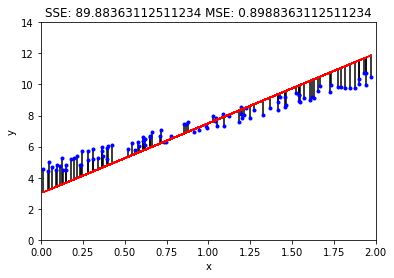

Line 4.5 * X + 3 has the following costs:
SSE: 89.88363112511234 MSE: 0.8988363112511234


In [ ]:
# m is the slope or w_1
# this changes the steppness of the slope
w = 4.5
# b is the bias or w_0
# (this changes the y-intercept values)
b = 3

# Here we can compute our line equation using simulated data X
y_hat = w * X + b

sse = np.sum((y_hat - y)**2)
mse = sse / len(X)

# Plotting
for i in range(len(y)):
    plt.plot([X[i], X[i]], [y[i], y_hat[i]], 'black')
plt.plot(X, y, 'b.')
plt.plot(X, y_hat, 'r')

# Plotting settings
plt.ylabel('y')
plt.xlabel('x')
plt.title(f"SSE: {sse} MSE: {mse}")
plt.ylim(0, 14)
plt.xlim(0, 2)
plt.show()

print(f"Line {w} * X + {b} has the following costs:\nSSE: {sse} MSE: {mse}")

As you adjust the values of `w` and `b` think about how this is to do manually! So how do we learn good parameters automatically? The answer is found in optimization theory!

### Optimizing: finding the minima

By minimizing our cost function (i.e., objective function) we can find the weights/parameter that give produce the smallest total error. In particular, let's minimize the MSE cost function. Thus, Mathematically we write this as follows:

$$
\wv^* =\min_\wv MSE = \min_\wv \frac{1}{m} \sum_{i=1}^{m} \Big(\hat{y}_i - y_i \Big)^2  = \min_\wv \frac{1}{m} \sum_{i=1}^{m} \Big( f(\xv_i; \wv) - y_i \Big)^2
$$

where in this equation

- $\wv^*$ represents the weights which will produce the best model to fit our data (i.e., smallest total error).

- $\min_\wv$ indicates we want to minimize our function with respect to our weights $\wv$.

- Note, $f(\xv_i; \wv) = \hat{y}_i$

Notice that the SSE function is quadratic, this means we can directly compute the best weights by simply setting the derivative with respect to $\wv$ equal to zero. Recall from calculus that **we can find a functions minimum or maximum by setting the derivative of an equation equal to 0**. This is the idea we want to apply here as well. We want to set the derivative of our MSE cost function with respect to $\wv$ equal to 0 so we can solve for the best weights!

> Note, however, things aren't this simple as finding the weights that cause our training data to produce an $MSE=0$. Recall that we can overfit to our data in machine learning, thus getting an error of or near zero might actually produce weights that are only work well on the training data!

Recall, we want to *minimize* our cost function $MSE$ because we want to find the smallest total error! If we wanted to find the worst model with the largest total error we would *maximize* our total error.


#### Options for minimizing MSE

1. The first method is *ordinary least squares* which is a closed-form solution. Meaning we can directly compute the best weights/parameters for our training data using a mathematical equation. Thus, a mathematical equation that gives us the results directly is referred to as a having a closed-form solution.
2. The second method is *least mean squares (LMS)* which uses an iterative optimization approach called Gradient Descent (GD). GD works by gradually tweaking our model weights/parameters to minimize a the square error.

## Ordinary Least Squares

The first method for finding our best weights $\wv$ is Ordinary Least Squares (i.e., Normal Equation). The equation for finding the $\wv$ is as follows:

$$\wv = \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \yv \tag{1}$$


Our goal will be to derive the following equation by taking the derivative of Eq. $1$. If you still feel shaky or anxiety about all the math you just saw, don't worry! The important equation to remember is Eq. $1$ as this is the closed form solution which we will need to covert to code! Meaning, Eq. $1$ will directly solve for the weights $\wv$ that give us the best fit for our data $\Xm$ (but maybe not for our unseen data)!


### Derivation
Recall the MSE equation is as given below. Let's first expand it and then take the derivative. Note we *drop $\frac{1}{m}$* for convenience (so you could say we are just minimizing the SSE) and $\sum_{i=1}^m$ goes away as we are working in matrix notation.

Recall two theorems from linear algebra: $(A+B)^\top =A^\top +B^\top$ and $(AB)^\top = B^\top A^\top$.

Good. Now let's look at the following equation:

$$
\begin{align}
MSE(\wv) &=  \sum_{i=1}^m \Big(\hat{y}_i - y_i \Big)^2  \tag{2}\\
            \\
            &= (\Xm \wv - \yv)^2   \tag{2a}\\
            \\
            &= (\Xm \wv - \yv)^\top (\Xm \wv - \yv)  \tag{2b}\\
            \\
            &= ( \wv^\top \Xm^\top - \yv^\top) (\Xm \wv - \yv)  \tag{2c}\\
            \\
            &= \wv^\top \Xm^\top \Xm \wv -\wv^\top \Xm^\top \yv - \yv^\top \Xm \wv + \yv^\top \yv  \tag{2d}\\
            \\
            &= \wv^\top \Xm^\top \Xm \wv - 2 \wv^\top \Xm^\top \yv + \yv^\top \yv  \tag{2e}
\end{align}
$$

Recall the shapes of our variables: **X.shape = [m, n], y.shape = [m, 1],  w.shape =[n,1]**. You have 1 minute to calculate the shape of $\wv^\top \Xm^\top \yv$ and the shape $(\yv^\top \Xm \wv)^\top$. Let me know your results.

Then you will find the shapes of $\wv^\top \Xm^\top \yv$ and $(\yv^\top \Xm \wv)^\top$ are [1,1], which means they are sclars.
We know the transpose of a scalar is just itself, therefore $(\yv^\top \Xm \wv)^\top = \wv^\top \Xm^\top \yv$ holds true! Thus, we we get $2 \wv^\top \Xm^\top \yv$ in Eq. 2e. Actually, each of the four terms in Eq. 2d has shape [1,1], meaning they are all scalars. Ha, suprise?



Now, let's compute the partial derivative. For those of you that are like me that recall very little matrix derivative or manipulation rules check out this basic [cheat sheet pdf](www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf). Having this for reference will hopefully make some of the jumps in equations easier to follow.

$$\begin{align}
        \frac{\partial MSE(\wv)}{\partial \wv} &= \frac{\partial (\Xm \wv - \yv)^\top (\Xm \wv - \yv)}{\partial \wv} \tag{3}\\
                \\
                &= \frac{\partial (\wv^\top \Xm^\top \Xm \wv - 2 \wv^\top \Xm^\top \yv + \yv^\top \yv )}{\partial \wv} \tag{3a}\\
                \\
                &= \frac{\partial (\wv^\top \Xm^\top \Xm \wv)}{\partial \wv} - 2 \Xm^\top \yv \tag{3b} \\
                \\
                &= 2 \Xm^\top \Xm \wv - 2 \Xm^\top \yv \tag{3c}
\end{align}$$

For Eq. $\ref{eq3a}$, when taking the derivative of $\frac{\partial ( 2 \wv^\top \Xm^\top \yv )}{\partial \wv}$ think of $ 2 \Xm^\top \yv$ as constant multiplied by $\wv$ so we are just left with $2 \Xm^\top \yv$ after taking the derivative with respect to $\wv$. Likewise, as $\frac{\partial (\yv^\top \yv)}{\partial \wv}$ does not depend on $\wv$ it goes to zero just like we are used to seeing with typical scalar derivatives.

For Eq. $\ref{eq3b}$, $\frac{\partial (\wv^\top \Xm^\top \Xm \wv)}{\partial \wv}$ is quadratic so it reduces to $2 \Xm^\top \Xm \wv$. This matrix derivative rule is similar to the power rule where $w^2 = 2w$. Thus, anytime you see a quadratic  $\wv^\top \wv$ think of the power rule from calculus 1 where the matrices $\Xm^T$ and $\Xm$ are treated as constants!

If you still don't understand what happened, check Section B in the above derivate cheatsheet.

<!-- $$\begin{align}
                 &= \Xm^\top \Xm \wv + (\Xm^\top \Xm)^\top \wv - 2 \Xm^\top \yv \tag{3d}\\
                 &= 2 \Xm^\top \Xm \wv - 2 \Xm^\top \yv \tag{3e} \\
              
\end{align}$$
 -->

As we want to minimize MSE with respect to w, let's set Eq. $\ref{eq3c}$ to zero, we can derive the closed form solution for ordinary least squares,
$$
\begin{align}
 2 \Xm^\top \Xm \wv - 2 \Xm^\top \yv \&=0   \tag{4} \\
\\
\Xm^\top \Xm \wv &= \Xm^\top \yv \tag{4a} \\
\\
\wv &= \big(\Xm^\top \Xm\big)^{-1} \Xm^\top \yv \tag{4b}
\end{align}
$$

Note, Eq 4a doesn't mean $\Xm \wv = \yv$. This is not correct in matrix multiplication.



### Converting to code

Below we implement the least squares model and apply to the simulated data `X` and `y` defined in the *Defining Linear Models* section. To compute the inverse we use the `np.linalg.inv()` function or `np.linalg.pinv()` to find the pseudo-inverse (approximate inverse) if our matrix is non-invertible.

#### Bias Term (y-intercept)
Recall, our data is missing a feature which corresponds to the bias term (recall $w_0$ is our bias term). We need to account for the bias term in our data matrix by adding a column of 1's to first column of our data $\xm$. We set the bias term equal to 1 so that the learned weight will directly correspond to the y-intercept value ($w_0 * 1 = w_0$). Thus, our first weight $w_0$ corresponds to the exact value of the y-intercept!

Further recall, the bias term allows us to shift our line-of-best fit up and down the y-axis! Without this term our linear model losses some much needed flexibility as it **must** pass through the origin.

![](https://qph.fs.quoracdn.net/main-qimg-c0bb76e8e57e9a33170c45265eadb213)

In [ ]:
m_samples = len(X)
bias = np.ones((m_samples, 1))
# add bias term to our input data
X1 = np.hstack([bias, X])

# Compute the best weights
w = np.linalg.inv(X1.T @ X1) @ X1.T @ y

In [ ]:
w

array([[4.51359766],
       [2.98323418]])

If you look at our learned weights `w` can see we have leaned a bias of $4.51359766$ and a slope of $2.98323418$. Wait! Previously we said the shape of `w` is [n,1], where w is a scalar here?

The answer is: you will find that the shape for X is [100,1] in the following cell, it means we have 100 samples in dataset (m=1) and each sample has a single feature (n=1). As n=1, so our w has shape [1,1] which is a scalar.


In [ ]:
X.shape

(100, 1)

After getting the parameter `w` we can make our predictions by computing $\hat{\yv} = \xm \wv$

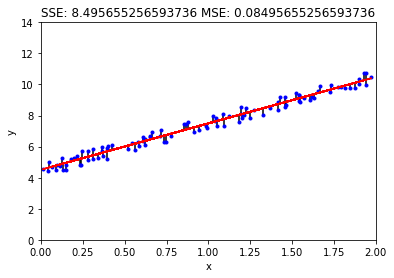

Line 4.5 * X + 3 SSE: 8.495655256593736 MSE: 0.08495655256593736


In [ ]:
# Predictions
y_hat = X1 @ w

# Cost
sse = np.sum((y_hat - y)**2)
# Mean Error
mse = sse / len(X)

# Plotting
for i in range(len(y)):
    plt.plot([X[i], X[i]], [y[i], y_hat[i]], 'black')
plt.plot(X, y, 'b.')
plt.plot(X, y_hat, 'r')

# Plotting settings
plt.ylabel('y')
plt.xlabel('x')
plt.title(f"SSE: {sse} MSE: {mse}")
plt.ylim(0, 14)
plt.xlim(0, 2)
plt.show()

print(f"Line {m} * X + {b} SSE: {sse} MSE: {mse}")


We did it! We found the line of best fit for our toy data. Note that what we just did is referred to as *single variable linear regression*. If we have more than one feature then we perform *multiple linear regression*.

### Issues

While solving for the best weights is great, it is actually not typically plausible for practical large real-world datasets for two reasons:

1. First, because taking the inverse of our entire dataset $\xm^T \xm$ is extremely computationally expensive as our number of features $n$ becomes large (i.e., greater than 10,000)! Computing this inverse typically takes $O(n^3)$ time. In regards to data samples, ordinary least squares grows linearly in computation complexity so $O(m)$.

2. Second, because sometimes we are not able to fit our entire dataset into memory! When working with millions of data samples fitting all of our data into memory is not typically possible.

For these two reasons an iterative method for finding the best weights has been created! This following method is more important for you!

## Least Mean Squares (LMS)

*Least Means Squares (LMS)* or *Linear Regression with Gradient Descent* will be the iterative method for finding the weights for our model.  

In order to handle sufficiently large data, we'll need to utilize *sequential* or *online* learning. We refer to process of **learning a single data sample one-by-one as online learning**. Likewise, we refer to learning from the entire data at once, achived by spliting the whole dataset into a number of batches, as *batch learning*. Recall that ordinary least squares would be batch learning. As we'll see, LMS will utilize online learning.


As stated, in the online learning process, we learn from each data sample one-by-one. Meaning, we update our weights after learning from a single data sample. Using the updated weights, the model can make a new predictions and we can assess how well those new predictions do. We repeat these steps until our model converges (our weights stop changing significantly). Often times will require multiple passes over our data. Each pass over our data is referred to as an *epoch*.
<hr>


### **Gradient Descent**

Gradient descent is a generic yet powerful optimization algorithm which finds is used to find minimums or maximums of functions. It is assumed, that for most optimization problems the desirable solutions are found either a maximum or minimum, depending on the framing of the problem. Imagine a function where if we computed every value of the function we might end of with a landscape of the function. This "landscape" might look something like the graph below. Here the colors indicate the steepness of the function landscape.

![](https://www.researchgate.net/profile/Alexander-Amini/publication/325142728/figure/fig1/AS:766109435326465@1559666131320/Non-convex-optimization-We-utilize-stochastic-gradient-descent-to-find-a-local-optimum.jpg)

*Note, most functions have many maximums and minimums. We say that the highest maximum or lowest minimum is the **global** maximum/minimum. All other maximums/minimums are referred to as **local** maximums/minimums.*

Recall our goal is to *minimize*, thus for the above function landscape we'd want to find the global minimum as this would produce the best weights to solve our problem. However, finding the global minimum in real-world problems is really hard and we often find that local minimums solve our problems well enough!

The main question is how do we know which way is down? This is where the gradient comes in! Recall that **the gradient points in the direction of steepest ascent**. If we want to find a minimum then we'd want to take the negative of the gradient at our current location. **The negative of the gradient then points in the direction of steepest descent**!

- References
    - Geron [Chapter 4](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html) (see the Gradient Descent sub-section)

<hr>

#### Toy Example
Let's look at a visualization to get a better understanding.

<img src=https://www.oreilly.com/api/v2/epubs/9781491962282/files/assets/mlst_0402.png width=500, height=500>


In the above image, imagine we are want to find the minimum of a cost function $x^2$ which is a quadratic function like our MSE/SSE cost functions. At minimum of our cost function we'll find the weights $\wv$ or parameters $\mathbf{\theta}$ that produce the model that best fits our data!

All we need to do is find the gradient at our given location. Recall the gradient is just the derivative of our function with respect to all the different variables in our function, better known as taking the partial derivative of a function. In our case, we only have one variable which is $x$. Our derivative is then $2x$!

Thus to move in the direction of steepest descent we have to update our position using the following equation:

$$
x_{k+1} = x_{k} - \alpha * 2 x_k
$$

where in this equation:

- $\alpha$ is **learning rate** hyperparameter which determines the step-size. In other words, this hyperparamter dictates how big or small of a step we will take in the direction of the gradient.
- $x_k$ represents our current position.
- $x_{k+1}$ represents our new position after taking a gradient step.

Picking the right learning rate $\alpha$ is tricky and is more of an art than a science. If we pick a learning rate value that is too low, we will take very small steps which will cause us to take a very long time to find a minimum (below image).

<img src=https://www.oreilly.com/api/v2/epubs/9781491962282/files/assets/mlst_0403.png width=500, height=500>

Likewise, picking large values means taking big steps which can cause us to overstep a minimum and diverge away from it (below image).

<img src=https://www.oreilly.com/api/v2/epubs/9781491962282/files/assets/mlst_0404.png width=500, height=500>

With this idea in mind we can generate a general gradient descent update rule for any function $f(x)$ as follows:

$$
x_{k+1} = x_k - \alpha \nabla f(x_k)
$$

where in this equation:
- $\nabla$ (nabla) is the symbol for computing the gradient of the function that follows it.
- $f(x)$ is our function or model.


#### The Mean Squared Error Gradient
Now instead of minimize the function $x^2$ let's minimize the $MSE$ equation in order to find the best weights. Recall the following was our minimization equation.

$$
J(\wv) = \min_\wv \frac{1}{2m}\sum_{i=1}^{m}\Big( \hat{y}_i - y_i \Big)^2, \textrm{where} \quad \hat{y}_i=f(\xv_i; \wv)  \tag{5}
$$

Note that $J(\wv)$ replaces $MSE$ as $J$ is classical notation you'll find in machine learning when referring to minimizing a function with gradient descent. Here $J$ is simply a generic placeholder. Optionally we could use $MSE$ like we did before, but the $J$ notation is more general.

Alright, so how do we compute the gradient. This is easy, recall that we just need to compute the derivative of Eq. $\ref{lms}$ just like we did for ordinary least squares but now only with vectors since we are using an online algorithm!

The only derivative rules we'll need here are the [chain rule](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1a/v/chain-rule-introduction) and [power rule](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-1-new/ab-2-5/v/power-rule). Also, notice we multiply our squared error by $\frac{1}{2}$. This is solely for mathematical convenience so that our derivative is cleaner such that when we take the power rule the 2 will cancel out! See [this post](https://datascience.stackexchange.com/questions/52157/why-do-we-have-to-divide-by-2-in-the-ml-squared-error-cost-function) for an additional explanation. Lastly, we drop $\frac{1}{m}$ for convenience such that we are technically now just minimizing the SSE!
$$
\begin{align}
\nabla J(\wv_{k}) = \frac{\partial J(w_{k})}{\partial \wv_{k}} &= \frac{\partial }{\partial \wv_{k}} \frac{1}{2} \Big( \hat{y}_i - y_i \Big)^2 \\
\\
        &= \Big( \hat{y}_i - y_i \Big) \frac{\partial }{\partial \wv_{k}} \Big( \hat{y}_i - y_i \Big) \\
        &= \Big( { \xv_i \wv_{k}} - y_i \Big) \frac{\partial }{\partial \wv_{k}} \Big( { \xv_i \wv_{k}} - y_i \Big) \\
        &= \Big( { \xv_i \wv_{k}} - y_i \Big) \xv_i.
\end{align}
$$




Thus our gradient will be as follows

$$
\nabla J(\wv_{k}) = \Big( \xv_i \wv_k  - y_i \Big) \xv_i.
$$

We can then construct a weight update rule similar to how we updated the x-coordinate above
$$
\begin{align}
\wv_{k+1} &=  \wv_{k} - \alpha \nabla J(\wv_{k}) \\
&= \wv_{k} - \alpha \Big({ \xv_i \wv_{k}} - y_i \Big) \xv_i. \tag{6}
\end{align}
$$


### Converting to code

Now that we have an idea of how gradient descent works and we have our weight update equation $\wv_{k+1} =  \wv_{k} - \alpha \Big( { \xv_i \wv_{k}} - y_i \Big) \xv_i$ we can program the LMS algorithm.

Recall all we need to do is loop over our entire dataset and apply the weight update to each sample one at a time! Let's quickly breakdown the code.


Here we randomly initialize our weights. We do so because we don't know what the best weights are, so randomly selecting our initial weights is the most common and naive approach. Further, note that if you change the seed `np.random.RandomState(0)` you'll get different random weights. If you don't converge to the optimal weights then the final weight values might be different for each initial random weight values!
```Python
rng = np.random.RandomState(0)
w = rng.rand(X1.shape[1])
```

Next, we define some variables such as the learning rate (step-size) and epoch (number of passes over our data). Note that to converge to the same weights as ordinary least squares found you'll need to specify 2 epochs! Also, try messing around with the learning rate and see what happens when you set it to `.01` or `1`.
```Python
alpha = 0.1
epoch = 1
```

We then specify two for loops. The first determines how many pass we make over our data and is dictated by the number of epochs. The second is the inner loop which loops over each sample in our data. We use `i` to index each individual data sample for `X` and label `y`.
```Python
for e in range(epoch):
    for i in range(m_samples):
```

Within the for loop we must first compute our prediction for the current data sample as we need this to compute the cost function and in turn the gradient.
```Python
y_hat = X1[i, :] @ w
```

Next, we compute the gradient using the predicted value `y_hat`, our label `y[i]` and our feature vector or data sample `X1[i, :]`.
```Python
gradient = (y_hat - y[i]) * X1[i, :]
```

Note, in the above equation, we use y_hat instead of `X1[i, :] @ w` (as shown in Eq. 6) for simplify.

We can then apply the weight update using our gradient and learning rate.
```Python
w -= alpha * gradient
```

Finally, although this isn't always needed, we compute the predications for **all** our data using the updated weights and compute the new total error.

*Note that we have to reshape `preds` so that when we compute the `total_error` NumPy doesn't return us a (100, 100) array. Recall the Python Review lab where we discussed broadcasting. Since our `preds` has a shape (100,) and `y` has a shape (100, 1) then NumPy would broadcast preds to be (1, 100). This would in turn cause the output to be (100, 100) as NumPy would as NumPy would scale the first dimension of `preds` to 100 and the second dimension of `y` to 100.*
```Python
preds = X1 @ w
preds = preds.reshape(-1, 1)
total_error = np.sum((preds - y)**2)
```

(2,)


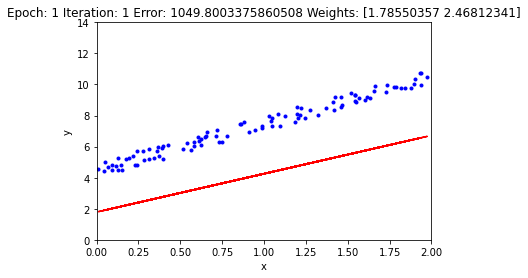

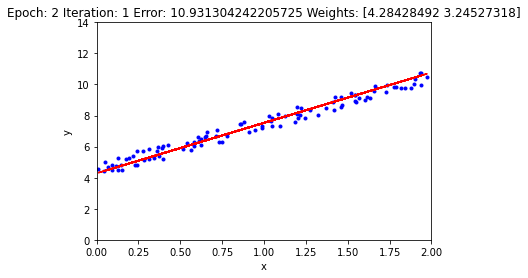

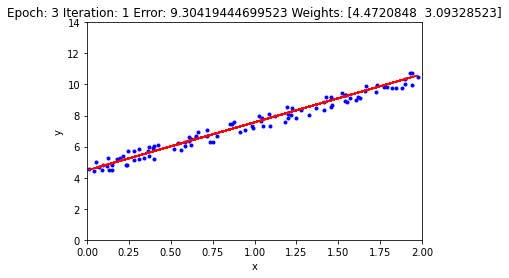

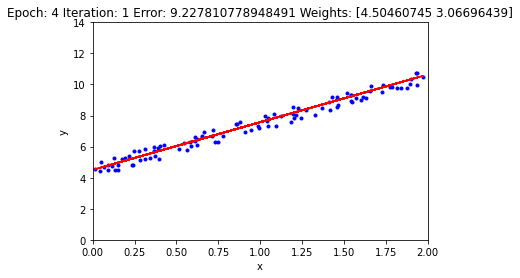

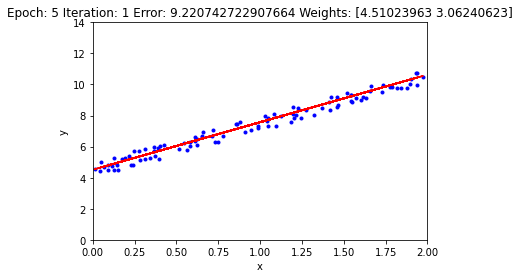

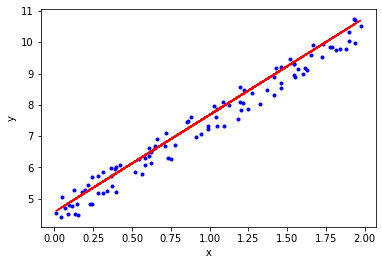

In [ ]:
import IPython.display as ipd  # for display and clear_output

# initial weights with random values
rng = np.random.RandomState(0)
w = rng.rand(X1.shape[1])
print(w.shape)

# learning rate
alpha = 0.1
# Number of passes over our data
epoch = 5
# Store our gradients for each data sample
grads = []

fig = plt.figure()

for e in range(epoch):
    # sequential learning
    for i in range(m_samples):

        # Make a prediction use current weights
        y_hat = X1[i, :] @ w

        # Gradient weight update
        gradient = (y_hat - y[i]) * X1[i, :]
        grads.append(gradient)
        # This is the same as w = w - alpha * gradient
        w -= alpha * gradient

        # Make new predictions for entire dataset
        # Here we refer to the y_hat vector as preds
        preds = X1 @ w

        # We need to reshape our preds to be a 2D array
        # otherwise when we compute (preds - y)**2 we will
        # get an array of shape (100, 100) instead of a (100, 1)
        # this is due to the automatic broadcasting NumPy does!
        preds = preds.reshape(-1, 1)

        # Computes sum of squared errors
        total_error = np.sum((preds - y)**2)

        plt.clf()

        # Plotting
        plt.plot(X, y, 'b.')
        plt.plot(X, preds, 'r')

        plt.ylabel('y')
        plt.xlabel('x')
        if i ==1:
          plt.title(f"Epoch: {e+1} Iteration: {i} Error: {total_error} Weights: {w}")
          plt.ylim(0, 14)
          plt.xlim(0, 2)

          # clear display
          # ipd.clear_output(wait=True)
          ipd.display(fig)

# # ipd.clear_output(wait=True)
# print("Epoch: {} Weights: {}".format(e, w))

Recall, based on ordinary least square (the first part of this class), the global minimum (the best solution) of our linear model is: the bias 'b' as $4.51359766$ and the slope `w' as $2.98323418$. Then, staring at the above results during the iteration, it iterates for more epoches, the learned weights are more closer to [4.51359766, 2.98323418].
It means, the gradient descent-based method is approaching the global minimum.

The iteration-based method works!